<a href="https://colab.research.google.com/github/JedWojtowicz/MAD_jw/blob/main/JW_lab_07_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
dp_imiona = "https://github.com/kropiak/swps-metody-analizy-danych/raw/refs/heads/main/lab_07/data/imiona.xlsx"
dp_ludnosc = "https://github.com/kropiak/swps-metody-analizy-danych/raw/refs/heads/main/lab_07/data/ludnosc.xlsx"
dp_zamowienia = "https://github.com/kropiak/swps-metody-analizy-danych/raw/refs/heads/main/lab_07/data/zamowienia.csv"
df_zamowienia = pd.read_csv((dp_zamowienia), sep=';')
df_ludnosc = pd.read_excel((dp_ludnosc))
df_imiona = pd.read_excel((dp_imiona))

**Zadanie 1**

Przygotuj i wyświetl wykres liniowy funkcji f(x) = 1/x dla x ϵ [1, 20]. Dodaj etykietę do linii wykresu i wyświetl legendę. Dodaj odpowiednie etykiety do osi wykresu (‘x’, ’f(x)’) oraz ustaw zakres dla obu osi na (0, 1) oraz (1, długość wektora x).

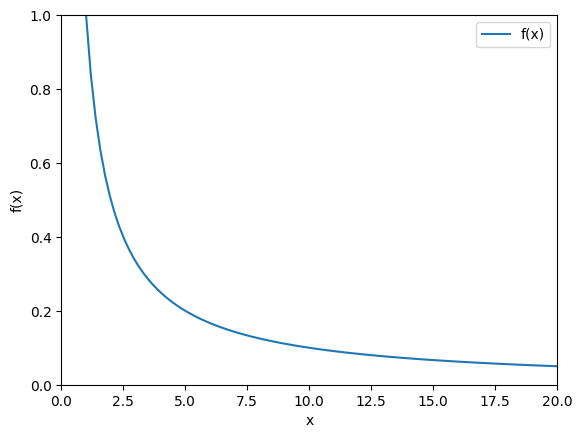

In [2]:
x = np.linspace(1, 20, 100)
y = lambda x: 1/x
plt.plot(x, y(x), label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.axis([0, 20, 0, 1])
plt.show()

**Zadanie 2**

Korzystając ze zbioru danych [zamowienia.csv](./data/zamowienia.csv) przygotuj i wyświetl dane w postaci wykresu liniowego z sumą zamówień dla każdego sprzedawcy z Polski w roku 2004 grupując po miesiącach (wzoruj się przykładzie z pkt. 3 tego labu). Każdy wykres to linia dla danego sprzedawcy, a oś x reprezentuje kolejne miesiące roku 2004. Pamiętaj o tym, że można iterować przez zgrupowaną ramkę danych pandas.

Text(0, 0.5, 'Utarg')

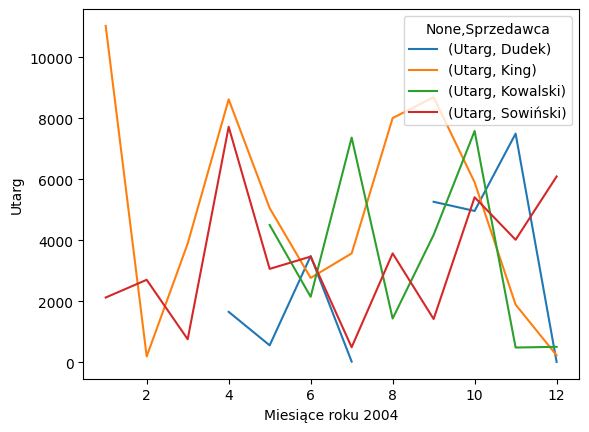

In [3]:
df_zamowienia2 = df_zamowienia.copy()
df_zamowienia2['Data zamowienia'] = pd.to_datetime(df_zamowienia2['Data zamowienia'])
df_zamowienia2 = df_zamowienia2[(df_zamowienia2['Kraj'] == 'Polska') & (df_zamowienia2['Data zamowienia'].dt.year == 2004)]
df_zamowienia2.groupby([df_zamowienia2['Data zamowienia'].dt.month,'Sprzedawca']).agg({'Utarg': 'sum'}).unstack().plot()
plt.xlabel('Miesiące roku 2004')
plt.ylabel('Utarg')

**Zadanie 3**

Korzystając z biblioteki pandas wczytaj zbiór danych z [narodzinami dzieci](./data/imiona.xlsx) przygotuj poniższe wykresy:
* 3.1 - wykres słupkowy przedstawiający ilość narodzonych dziewczynek i chłopców w całym okresie.
* 3.2 - wykres liniowy, gdzie będą dwie linie, jedna dla ilości urodzonych kobiet, druga dla mężczyzn dla każdego roku z osobna. Czyli y to ilość narodzonych kobiet lub mężczyzn (dwie linie), x to rok.
* 3.3 - wykres słupkowy przedstawiający sumę urodzonych dzieci w każdym roku.

Dodaj do wykresów stosowne etykiety. Poustawiaj różne kolory dla wykresów.

Text(0, 0.5, 'Liczba urodzonych dzieci')

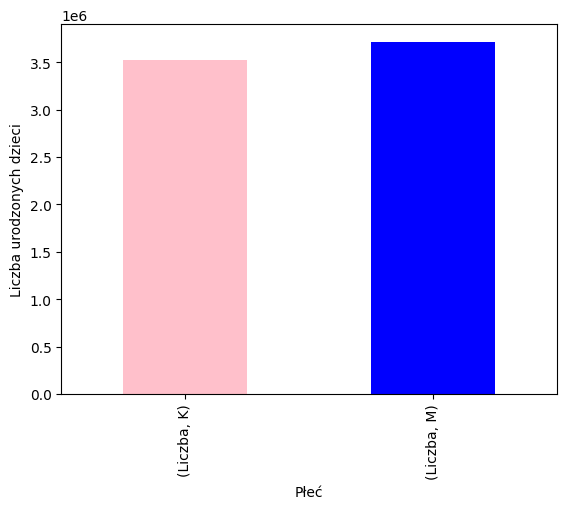

In [4]:
#3.1
df_imiona_1 = df_imiona.groupby('Plec').agg({'Liczba': 'sum'})
df_imiona_1.unstack().plot(kind='bar', color=['pink', 'blue'])
plt.xlabel('Płeć')
plt.ylabel('Liczba urodzonych dzieci')

Text(0, 0.5, 'Liczba urodzonych dzieci')

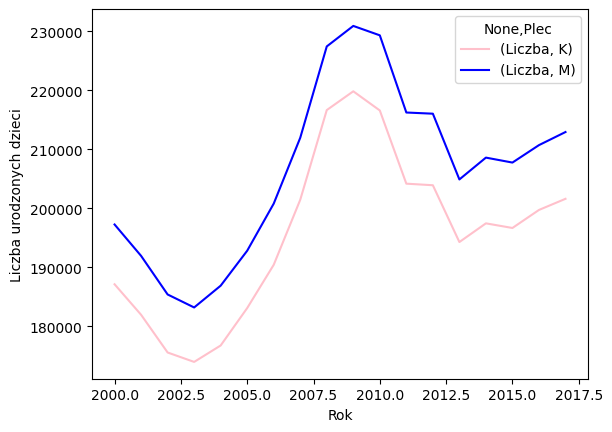

In [5]:
#3.2
df_imiona_2 = df_imiona.groupby(['Rok', 'Plec']).agg({'Liczba': 'sum'})
df_imiona_2.unstack().plot(color = ['pink','blue'])
plt.xlabel('Rok')
plt.ylabel('Liczba urodzonych dzieci')

Text(0, 0.5, 'Liczba urodzonych dzieci')

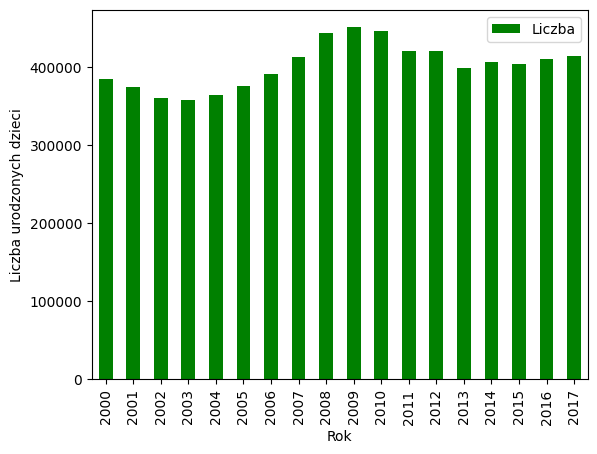

In [6]:
#3.3
df_imiona_3 = df_imiona.groupby('Rok').agg({'Liczba': 'sum'})
df_imiona_3.plot(kind='bar', color = 'g')
plt.xlabel('Rok')
plt.ylabel('Liczba urodzonych dzieci')

**Zadanie 4**

Korzystając ze zbioru danych Iris (https://archive.ics.uci.edu/ml/datasets/iris) wygeneruj wykres punktowy, gdzie wektor x to wartość `sepal length` a y to `sepal width`, dodaj paletę kolorów `c` na przykładzie listingu 7, a parametr `s` niech będzie wartością bezwzględną z różnicy wartości poszczególnych elementów wektorów x oraz y. Wykorzystaj bibliotekę pandas do przechowania datasetu.

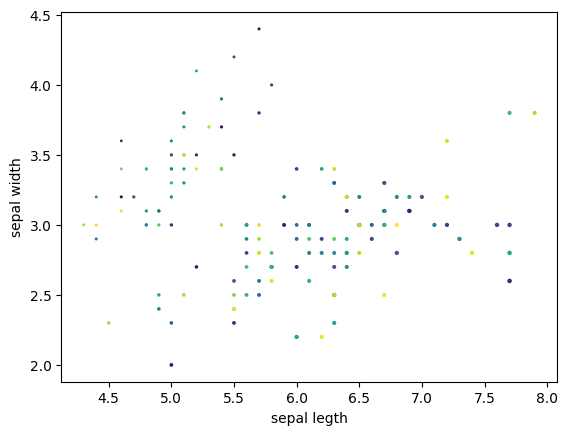

In [7]:
dp_iris = "https://raw.githubusercontent.com/kropiak/swps-metody-analizy-danych/refs/heads/main/lab_04/iris.data"
df_iris = pd.read_csv(dp_iris)
plt.scatter(df_iris['sepal length in cm'], df_iris['sepal width in cm'], c= np.random.randint(0, 150, 150), s=np.abs(df_iris['sepal length in cm'] - df_iris['sepal width in cm']))
plt.xlabel('sepal legth')
plt.ylabel('sepal width');

**Zadanie 5**

Korzystając z pliku [zamowienia.csv](./data/zamowienia.csv), policz sumy zamówień dla każdego sprzedawcy i wyświetl wykres kołowy z procentowym udziałem każdego sprzedawcy w ogólnej sumie zamówień. Poszukaj w Internecie jak dodać cień do takiego wykresu i jak działa atrybut `explode` tego wykresu. Wyświetl wykres podstawowy, z cieniem oraz z jednym elementem z aktywnym atrybutem `explode`.

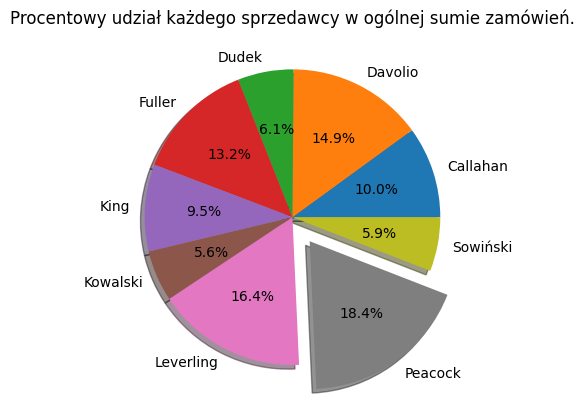

In [28]:
df_zamowienia_1 = df_zamowienia.groupby('Sprzedawca').agg({'Utarg': 'sum'})
#print(df_zamowienia_1)
data = df_zamowienia_1['Utarg']
labels = df_zamowienia_1.index
exp = [0] * (len(data) - 2) + [0.2,0]
plt.pie(data, labels=labels, autopct='%1.1f%%', explode = exp,shadow=True)
plt.title("Procentowy udział każdego sprzedawcy w ogólnej sumie zamówień.")
plt.show()

**Zadanie 6**

Korzystając z galerii matplotlib i [przykładu](https://matplotlib.org/stable/gallery/misc/packed_bubbles.html#sphx-glr-gallery-misc-packed-bubbles-py) postaraj się umieścić analogicznie 10 najbardziej ludnych krajów na świecie w roku 2017 korzystając z danych w pliku [ludność](./data/ludnosc.xlsx).

In [112]:
df_ludnosc_1 = df_ludnosc[['Kraj', 2017]].sort_values(by=2017, ascending=False).head(10)
df_ludnosc_1
data = {
    'kraje': df_ludnosc_1['Kraj'],
    'ludnosc': df_ludnosc_1[2017],
    'color': ['#003f5c','#58508d','#bc5090','#ff6361','#ffa600','#003f5c','#58508d','#bc5090','#ff6361','#ffa600']
}
data

{'kraje': 0    Chińska Republika Ludowa
 1                       Indie
 2             Unia Europejska
 3           Stany Zjednoczone
 4                   Indonezja
 5                    Brazylia
 6                    Pakistan
 7                     Nigeria
 8                  Bangladesz
 9                       Rosja
 Name: Kraj, dtype: object,
 'ludnosc': 0    1.379303e+09
 1    1.281936e+09
 2    5.161954e+08
 3    3.266258e+08
 4    2.605807e+08
 5    2.073534e+08
 6    2.049249e+08
 7    1.906323e+08
 8    1.578266e+08
 9    1.422575e+08
 Name: 2017, dtype: float64,
 'color': ['#003f5c',
  '#58508d',
  '#bc5090',
  '#ff6361',
  '#ffa600',
  '#003f5c',
  '#58508d',
  '#bc5090',
  '#ff6361',
  '#ffa600']}

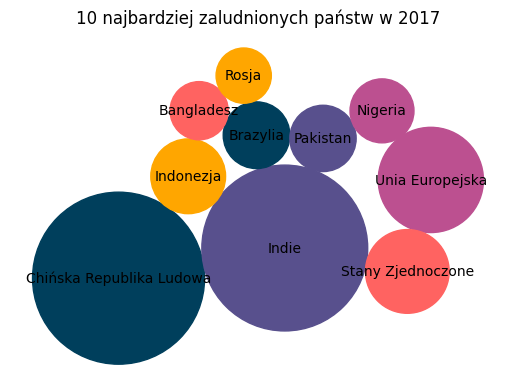

In [114]:
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=data['ludnosc'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, data['kraje'], data['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('10 najbardziej zaludnionych państw w 2017')

plt.show()